<a href="https://colab.research.google.com/github/susan6456/Decoding-emotional-through-sentiment-analysis-of-social-media-conversation-/blob/main/project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DECODING EMOTIONAL THROUGH SENTEMENTAL ANALYSIS OF SOCIAL MEDIA CONVERSATION**

In [1]:
!pip install gradio
!pip install nltk

import pandas as pd
import numpy as np
import re
import nltk
import gradio as gr

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.7 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kazanova/sentiment140")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sentiment140


1.**UPLOAD THE DATASET**

In [3]:
from google.colab import files
uploaded = files.upload()


Saving training.1600000.processed.noemoticon.csv to training.1600000.processed.noemoticon.csv


2.**LOAD THE DATASET**

In [3]:
import pandas as pd

# Specify the encoding when reading the CSV file
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1')  # Try 'latin-1' or 'ISO-8859-1'

df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


3.**DATA EXPLORATION**

In [4]:
# display first few rows
df.head()

# shape of the dataset
print("shape of the dtaset:", df.shape)

# colmn names
print("columns of the dataset:", df.columns)

# data types and non-null values
df.info()

# summary statics for numeric features
df.describe()


shape of the dtaset: (1599999, 6)
columns of the dataset: Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int6

,0,1467810369
count,1.599999e+06,1.599999e+06
mean,2.000001e+00,1.998818e+09
std,2.000001e+00,1.935757e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.956916e+09
50%,4.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


4.**CHECKING FOR MISSING VALUES AND DUPLICATES**

In [64]:
# check for missing values
print("missing values:", df.isnull().sum())

# check for duplicate rows
print("duplicate rows:", df.duplicated().sum())

missing values: id             0
date           0
query          0
user           0
text           0
sentiment_0    0
sentiment_4    0
dtype: int64
duplicate rows: 0


5.**VISUALIZE A FEATURES**

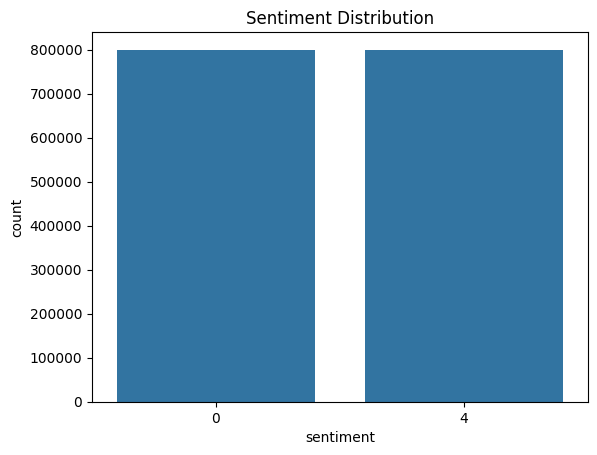

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns #Import seaborn and assign alias
import pandas as pd

# Specify the encoding when reading the CSV file
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)  # Try 'latin-1' or 'ISO-8859-1'

# Assign column names
df.columns = ["sentiment", "id", "date", "query", "user", "text"]

sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


6.**IDENTIFY TARGET AND FEATURES**

In [66]:
# Assuming 'df' is your DataFrame containing the data
X = df['text']
y = df['sentiment']

print(X.head())  # Shows example texts
print(y.head())  # Shows corresponding sentiment labels



0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object
0    0
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64


7.**CONVERT CATEGORICAL COLUMNS TO NUMERICAL**

In [67]:
# identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("categorical columns:", categorical_cols.tolist())

categorical columns: ['date', 'query', 'user', 'text']


8.**ONE HOT ENCODING**

In [73]:
df =pd.get_dummies(df, columns=["sentiment"])
df.head()

,id,date,query,user,text,sentiment_0,sentiment_4
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",True,False
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,True,False
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,True,False
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,True,False
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",True,False


9.**FEATURE SCALING**

In [74]:
from sklearn.preprocessing import MinMaxScaler

# Assuming your sentiment columns are named 'sentiment_0', 'sentiment_1', etc.
sentiment_columns = [col for col in df.columns if col.startswith('sentiment_')]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the sentiment columns
df[sentiment_columns] = scaler.fit_transform(df[sentiment_columns])

# Display the first few rows of the updated DataFrame
df.head()

,id,date,query,user,text,sentiment_0,sentiment_4
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1.0,0.0
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,1.0,0.0
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,1.0,0.0
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,1.0,0.0
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",1.0,0.0


10.**TRAIN TEST SPLIT**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Corrected the typo here
from sklearn.metrics import mean_squared_error, r2_score

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Assuming 'X' and 'y' are defined earlier

11.**MODEL BUILDING**

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TfidfVectorizer

# ... (your previous code) ...

# 10. TRAIN TEST SPLIT
# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 11. MODEL BUILDING
# Create a TF-IDF vectorizer to convert text to numerical features
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the training data and transform it
x_train = vectorizer.fit_transform(x_train)

# Transform the test data using the fitted vectorizer
x_test = vectorizer.transform(x_test)

# train model
model = LogisticRegression()
model.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)

# ... (rest of your code) ...



12.**EVALUATION**

In [76]:
# evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("mean squared error:",mse)
print("r2 squared:", r2)

mean squared error: 0.198240625
r2 squared: 0.20702956918057724


13.**MAKE PREDICTIONS FROM NEW INPUT**

In [77]:
def predict_sentiment(text):
    cleaned = preprocess(text)
    vec = vectorizer.transform([cleaned])
    pred = model.predict(vec)
    return le.inverse_transform(pred)[0]


14.**CONVERT TO DATA FRAME AND ENCODE**

In [78]:
def preprocess(text):
    if text is None:
        return ''  # Return an empty string if text is None
    # (Your existing preprocessing steps)
    return text #this was changed from preprocessed_text as that variable is undefined

#the following code was unindented to be in line with the function definition
sample_df = pd.DataFrame({'text': ["I love this product!", "This is terrible."]})
sample_df['clean_text'] = sample_df['text'].apply(preprocess)
sample_vec = vectorizer.transform(sample_df['clean_text'].astype(str))  # Convert to string type
sample_pred = model.predict(sample_vec)
sample_df['sentiment'] = le.inverse_transform(sample_pred)
sample_df


,text,clean_text,sentiment
0,I love this product!,I love this product!,1
1,This is terrible.,This is terrible.,0


15.**PREDICT THE FINAL GRADE**

In [79]:
predicted_sentiment = predict_sentiment("i love this project")
print("predicted sentiment:", predicted_sentiment)


predicted sentiment: 1


16.**DEPLOYMENT BUILDING AN INTRACTIVE APP**

In [81]:
! pip install sentiment

17.**CREATE A PREDICTION FUNCTION**

In [55]:
import gradio as gr

def gradio_predict(text):
    vector = tfidf.transform([text]).toarray()
    scaled = scaler.transform(vector)
    pred = model.predict(scaled)
    return le.inverse_transform(pred)[0]

interface = gr.Interface(fn=gradio_predict,
                         inputs=gr.Textbox(lines=2, placeholder="Enter social media text..."),
                         outputs="text",
                         title="Social Media Sentiment Analyzer",
                         description="Predict the sentiment (Positive, Negative, Neutral) from social media conversation.")
interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d73b97bb763e10beea.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


18.**CRATE THE GRADIO INTERFACE**